# Matplotlib - Subplots

## Table of contents

* [The `plt` interface: for instance, `plt.plot()`](#The-plt-interface:-for-instance,-plt.plot())
* [Creating a figure and a set of subplots: `plt.subplots(nrows=, ncols=, sharex=False, sharey=False)`](#Creating-a-figure-and-a-set-of-subplots:-plt.subplots(nrows=,-ncols=,-sharex=False,-sharey=False))
    * [What is a figure (`Figure` object) and an axis (`AxesSubplot` object)?](#What-is-a-figure-(Figure-object)-and-an-axis-(AxesSubplot-object)?)
    * [Understanding what is returned from `plt.subplots(nrows=, ncols=)`](#Understanding-what-is-returned-from-plt.subplots(nrows=,-ncols=))
        * [When `fig, ax = plt.subplots(nrows=1, ncols=1)`, `ax` is just a SINGLE `AxesSubplot` OBJECT](#When-fig,-ax-=-plt.subplots(nrows=1,-ncols=1),-ax-is-just-a-SINGLE-AxesSubplot-OBJECT)
        * [When `fig, ax = plt.subplots(nrows=2, ncols=1)`, `ax` is a LIST OF TWO `AxesSubplot` OBJECTS](#When-fig,-ax-=-plt.subplots(nrows=2,-ncols=1),-ax-is-a-LIST-OF-TWO-AxesSubplot-OBJECTS)
        * [When `fig, ax = plt.subplots(nrows=2, ncols=2)`, `ax` is an OUTER LIST OF TWO INNER LISTS OF TWO `AxesSubplot` OBJECTS EACH](#When-fig,-ax-=-plt.subplots(nrows=2,-ncols=2),-ax-is-an-OUTER-LIST-OF-TWO-INNER-LISTS-OF-TWO-AxesSubplot-OBJECTS-EACH)
    * [Creating ONE FIGURE with ONE AXIS: `plt.subplots(nrows=1, ncols=1)`](#Creating-ONE-FIGURE-with-ONE-AXIS:-plt.subplots(nrows=1,-ncols=1))
    * [Creating ONE FIGURE with TWO AXES: `plt.subplots(nrows=2, ncols=1)` or `plt.subplots(nrows=1, ncols=2)`](#Creating-ONE-FIGURE-with-TWO-AXES:-plt.subplots(nrows=2,-ncols=1)-or-plt.subplots(nrows=1,-ncols=2))
        * [Sharing the x- or y-axis: `plt.subplots(sharex=, sharey=)` argumets](#Sharing-the-x--or-y-axis:-plt.subplots(sharex=,-sharey=)-argumets)
    * [Creating TWO FIGURES with ONE AXIS EACH: Call `plt.subplots()` twice](#Creating-TWO-FIGURES-with-ONE-AXIS-EACH:-Call-plt.subplots()-twice)
* [Saving figures: `Figure.savefig(<filename>)`](#Saving-figures:-Figure.savefig(<filename>))

***

## The `plt` interface: for instance, `plt.plot()`

So far, we have been creating plots by simply using the `plt` interface, primarily because we were dealing with just one figure and one axis, and did not have to make a direct reference to the main underlying objects (i.e., the figure and the axis). 

However, in the `plt` interface, these objects are automatically instantiated, and each plt method is, essentially, translated to a call of one of the methods of the underlying fundamental objects: e.g., a `plt.plot()` is a `<hidden_axes>.plot`, and a `plt.savefig` is a `<hidden_figure>.savefig`.

Let's recreate a plot that we have previously created using the `plt` interface:

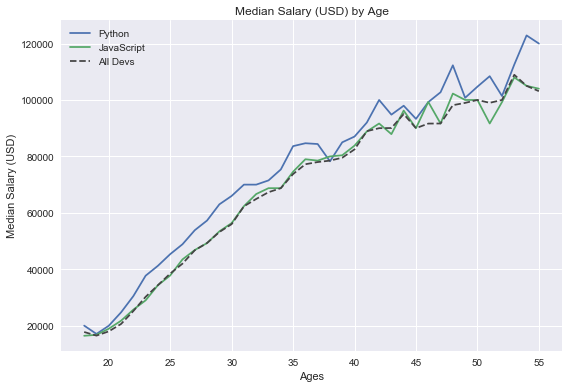

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('work_directory/matplotlib/code_snippets/10-Subplots/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, py_salaries, label='Python')
plt.plot(ages, js_salaries, label='JavaScript')
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

## Creating a figure and a set of subplots: `plt.subplots(nrows=, ncols=, sharex=False, sharey=False)`

Now we can use the `plt.subplots()` method to create a figure and a set of subplots. 

Using `plt.subplots()` is the **more common and preferred way of plotting** with `matplotlib`, because it allows us to directly ineract with the underlying fundamental objects: 
- the figure (`Figure` object), and 
- the axes (`AxesSubplot` objects). 

This is specially needed when we are dealing with multiple figures and/or axes.

### What is a figure (`Figure` object) and an axis (`AxesSubplot` object)?

You can think of the **figure** (`Figure` object) as a **canvas**, of which you typically specify the dimensions and possibly e.g., the background color etc. You use the canvas, the figure, essentially in two ways:
- placing other objects on it (mostly axes, but also text labels etc.), and 
- saving its contents with `.savefig()`.

You can think of an **axis** (`AxesSubplot` object) as a sort of **Swiss Army knife**, a handy object that offers a tool (e.g. `.plot()`, `.scatter()`, `.hist()` etc.) for everything, mostly. You can place one axis, or multiple axes inside a figure using one of many different methods.

### Understanding what is returned from `plt.subplots(nrows=, ncols=)`

Before we actually use `plt.subplots()` for plotting, it is important to understand what is returned from `plt.subplots(nrows=, ncols=)` method, to be able to **unpack** what is returned.

Basically, `plt.subplots(nrows=, ncols=)` returns:
- One `Figure` object, and 
- `AxesSubplot` object(s) depending on the `nrows=` and `ncols=` arguments. This is where the **unpacking** is needed.

#### When `fig, ax = plt.subplots(nrows=1, ncols=1)`, `ax` is just a SINGLE `AxesSubplot` OBJECT

Figure(576x396)
AxesSubplot(0.125,0.125;0.775x0.755)


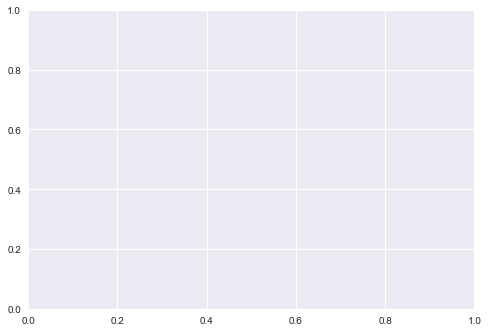

In [2]:
fig, ax = plt.subplots()

print(fig)
print(ax)

Therefore, the **unpacking of the** `AxesSubplot` **object is not needed.**

#### When `fig, ax = plt.subplots(nrows=2, ncols=1)`, `ax` is a LIST OF TWO `AxesSubplot` OBJECTS

Figure(576x396)


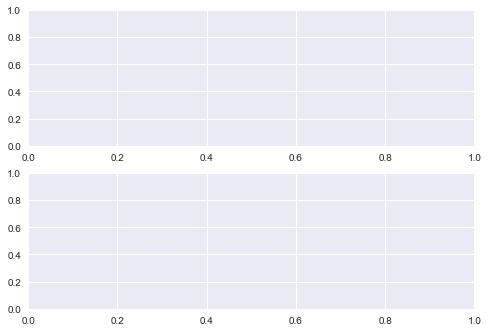

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=1)

print(fig)
print(ax)

Therefore, to **unpack** individual `AxesSubplot` objects:

Figure(576x396)
AxesSubplot(0.125,0.536818;0.775x0.343182) AxesSubplot(0.125,0.125;0.775x0.343182)


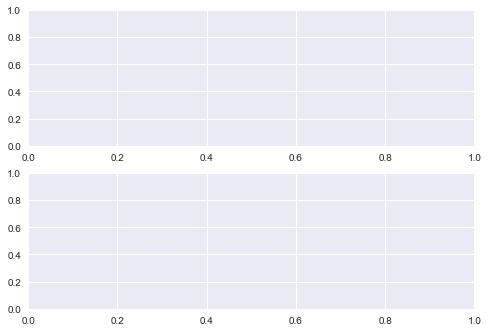

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)               # Note how the 'AxesSubplot' objects are being unpacked

print(fig)
print(ax1, ax2)

#### When `fig, ax = plt.subplots(nrows=2, ncols=2)`, `ax` is an OUTER LIST OF TWO INNER LISTS OF TWO `AxesSubplot` OBJECTS EACH

Figure(576x396)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E313404F08>


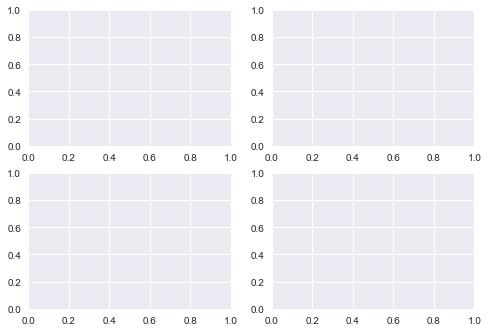

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)

print(fig)
print(ax)

Therefore, to **unpack** individual `AxesSubplot` objects:

Figure(576x396)
AxesSubplot(0.125,0.536818;0.352273x0.343182) AxesSubplot(0.547727,0.536818;0.352273x0.343182) AxesSubplot(0.125,0.125;0.352273x0.343182) AxesSubplot(0.547727,0.125;0.352273x0.343182)


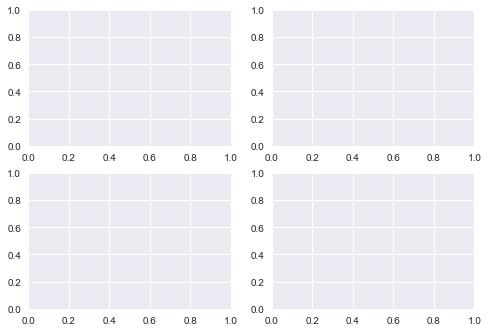

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)     # Note how the 'AxesSubplot' objects are being unpacked

print(fig)
print(ax1, ax2, ax3, ax4)

Now that we understand how to **unpack** what is returned from `plt.subplots()` method, we can proceed to using this method for creating subplots.

### Creating ONE FIGURE with ONE AXIS: `plt.subplots(nrows=1, ncols=1)`

Let's first replicate the plot above, by using `plt.subplots(nrows=1, ncols=1)` to create **one figure with one axis**:

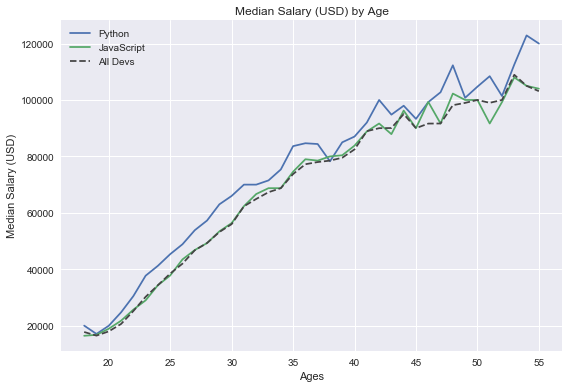

In [7]:
plt.style.use('seaborn')

data = pd.read_csv('work_directory/matplotlib/code_snippets/10-Subplots/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# Create figure and axes using plt.subplots()
fig, ax = plt.subplots()                      # default value for `nrows` and `ncols` is 1

# We would now plot, and set attributes, on the axis ('AxesSubplot' object) instead of on the `pyplot` object (imported as 'plt')
ax.plot(ages, py_salaries, label='Python')
ax.plot(ages, js_salaries, label='JavaScript')
ax.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax.legend()

# With subplots, the .title(), .xlabel() and .ylabel() methods get a 'set_' prefix
ax.set_title('Median Salary (USD) by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Median Salary (USD)')

plt.tight_layout()

### Creating ONE FIGURE with TWO AXES: `plt.subplots(nrows=2, ncols=1)` or `plt.subplots(nrows=1, ncols=2)`

Now, let's say that we wanted to split the above plot into two plots, with Python and JavaScript developer salaries plotted on one plot, and All developer salaries plotted on another plot, with the plots stacked vertically (`nrows=2` & `ncols=1`)

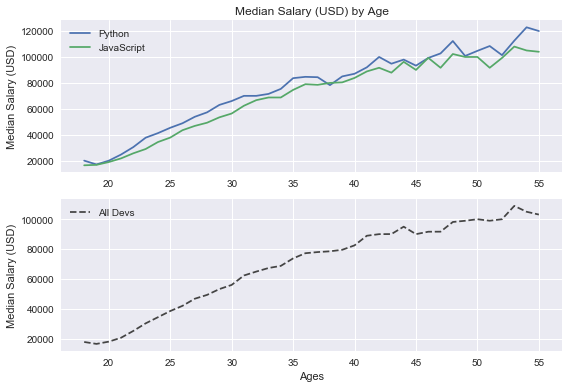

In [8]:
plt.style.use('seaborn')

data = pd.read_csv('work_directory/matplotlib/code_snippets/10-Subplots/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# Create figure and axes using plt.subplots()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)          # Note how the 'AxesSubplot' objects are being unpacked

ax1.plot(ages, py_salaries, label='Python')
ax1.plot(ages, js_salaries, label='JavaScript')
ax2.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax1.legend()
ax2.legend()

ax1.set_title('Median Salary (USD) by Age')
# ax1.set_xlabel('Ages')
ax1.set_ylabel('Median Salary (USD)')

# ax2.set_title('Median Salary (USD) by Age')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

#### Sharing the x- or y-axis: `plt.subplots(sharex=, sharey=)` argumets

- When `sharex=True`: x-axis will be shared among all subplots, and only the x tick-labels of the **bottom** subplot are created.
- When `sharey=True`: y-axis will be shared among all subplots, and only the y tick-labels of the **first column** subplot are created.

Now **let's share the x-axis among the subplots** in the plot above:


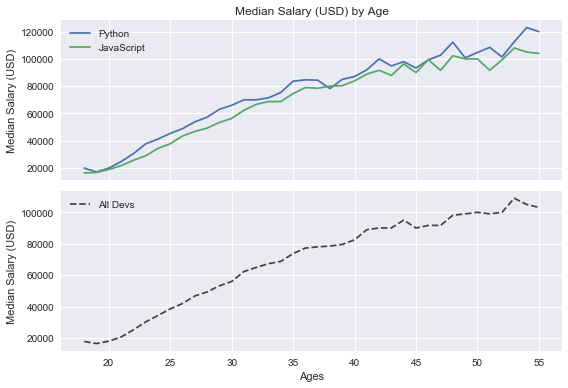

In [9]:
plt.style.use('seaborn')

data = pd.read_csv('work_directory/matplotlib/code_snippets/10-Subplots/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# Create figure and axes using plt.subplots()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)          # Added 'sharex=True'

ax1.plot(ages, py_salaries, label='Python')
ax1.plot(ages, js_salaries, label='JavaScript')
ax2.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax1.legend()
ax2.legend()

ax1.set_title('Median Salary (USD) by Age')
# ax1.set_xlabel('Ages')
ax1.set_ylabel('Median Salary (USD)')

# ax2.set_title('Median Salary (USD) by Age')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

### Creating TWO FIGURES with ONE AXIS EACH: Call `plt.subplots()` twice

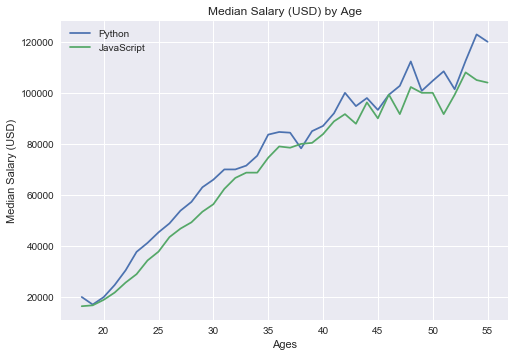

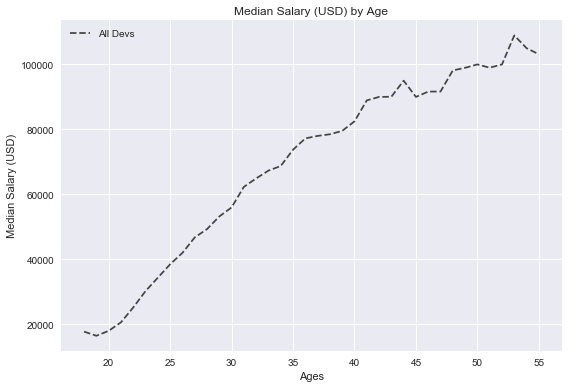

In [10]:
plt.style.use('seaborn')

data = pd.read_csv('work_directory/matplotlib/code_snippets/10-Subplots/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# Create two figures, with one axis each, using plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, py_salaries, label='Python')
ax1.plot(ages, js_salaries, label='JavaScript')
ax2.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax1.legend()
ax2.legend()

ax1.set_title('Median Salary (USD) by Age')
ax1.set_xlabel('Ages')
ax1.set_ylabel('Median Salary (USD)')

ax2.set_title('Median Salary (USD) by Age')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

Now, it might not be obvious that the cell above creates two figures, but that is actually what is happening. We could verify this by adding `%matplotlib notebook` at the top of the cell above and re-running it.

## Saving figures: `Figure.savefig(<filename>)`

We could save the two figures created above by simply using `fig1.savefig('fig1.png')` and `fig2.savefig('fig2.png')`.